# Classification_LR_Keras (1)

## Method

Build simple Logistic Regression model with Keras.

```
X_train: 50000 samples
X_test: 10000 samples

* used (X_test, Y_test) in validation data.

batch_size: 128
epochs: 100
```

In [1]:
import pickle

def unpickle(file):
    with open(file, 'rb') as f:
        pdict = pickle.load(f, encoding='bytes')
    return pdict

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# import metadata
metadata = unpickle('clf_data/batches.meta')
labels = metadata[b'label_names']
print(labels)

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


In [4]:
# import train batch
dataset = unpickle('clf_data/data_batch_1')

X_train = dataset[b'data']
y_train = dataset[b'labels']

for i in range(2,6):
    batch = unpickle(f'clf_data/data_batch_{i}')
    batch_X = batch[b'data']
    batch_y = batch[b'labels']
    
    X_train = np.append(batch_X, X_train, axis=0)
    y_train.extend(batch_y)

X_train.shape, len(y_train)

((50000, 3072), 50000)

In [5]:
# import test batch
dataset_test = unpickle('clf_data/test_batch')

X_test = dataset_test[b'data']
y_test = dataset_test[b'labels']

X_test.shape, len(y_test)

((10000, 3072), 10000)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train[0]

array([1.        , 0.98823529, 0.99215686, ..., 0.67843137, 0.90588235,
       0.97254902])

## Data categorize

In [7]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [8]:
output_dim = nb_classes = 10

In [9]:
input_dim = X_train.shape[1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [10]:
input_dim, X_train.shape, Y_train.shape

(3072, (50000, 3072), (50000, 10))

## Build Model

In [11]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
batch_size=128
epochs=100

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 70us/step - loss: 2.3336 - accuracy: 0.1124 - val_loss: 2.2135 - val_accuracy: 0.1888
Epoch 2/100
50000/50000 [==============================] - 3s 55us/step - loss: 2.3149 - accuracy: 0.1250 - val_loss: 2.1905 - val_accuracy: 0.1916
Epoch 3/100
50000/50000 [==============================] - 3s 52us/step - loss: 2.3094 - accuracy: 0.1301 - val_loss: 2.1935 - val_accuracy: 0.1999
Epoch 4/100
50000/50000 [==============================] - 3s 53us/step - loss: 2.3047 - accuracy: 0.1322 - val_loss: 2.2472 - val_accuracy: 0.1832
Epoch 5/100
50000/50000 [==============================] - 3s 54us/step - loss: 2.3038 - accuracy: 0.1328 - val_loss: 2.1644 - val_accuracy: 0.2610
Epoch 6/100
50000/50000 [==============================] - 3s 52us/step - loss: 2.3006 - accuracy: 0.1370 - val_loss: 2.1674 - val_accuracy: 0.2298
Epoch 7/100
50000/50000 [==============================] - 3s 

Epoch 56/100
50000/50000 [==============================] - 3s 53us/step - loss: 2.2601 - accuracy: 0.1633 - val_loss: 2.1799 - val_accuracy: 0.2110
Epoch 57/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.2596 - accuracy: 0.1630 - val_loss: 2.1332 - val_accuracy: 0.2732
Epoch 58/100
50000/50000 [==============================] - 3s 58us/step - loss: 2.2601 - accuracy: 0.1634 - val_loss: 2.1525 - val_accuracy: 0.2175
Epoch 59/100
50000/50000 [==============================] - 3s 54us/step - loss: 2.2582 - accuracy: 0.1654 - val_loss: 2.1457 - val_accuracy: 0.2561
Epoch 60/100
50000/50000 [==============================] - 3s 51us/step - loss: 2.2587 - accuracy: 0.1662 - val_loss: 2.1303 - val_accuracy: 0.2699
Epoch 61/100
50000/50000 [==============================] - 3s 52us/step - loss: 2.2579 - accuracy: 0.1675 - val_loss: 2.1480 - val_accuracy: 0.2572
Epoch 62/100
50000/50000 [==============================] - 3s 52us/step - loss: 2.2585 - accuracy: 0.1660

In [18]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Test error: 2.137797576522827
Test accuracy: 0.24809999763965607


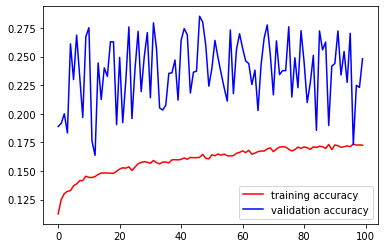

In [16]:
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

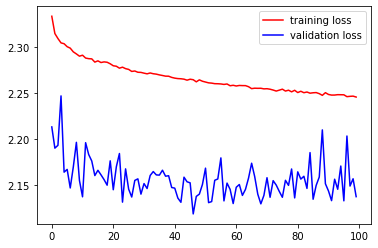

In [17]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

## Inference

In [19]:
predictions = model.predict_classes(X_test)

In [21]:
# we can also use a confusion matrix to visualize the performance of a classification model
cm = confusion_matrix(y_test, predictions)
# use this line to normalize the confusion matrix to show percentages instead of counts
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


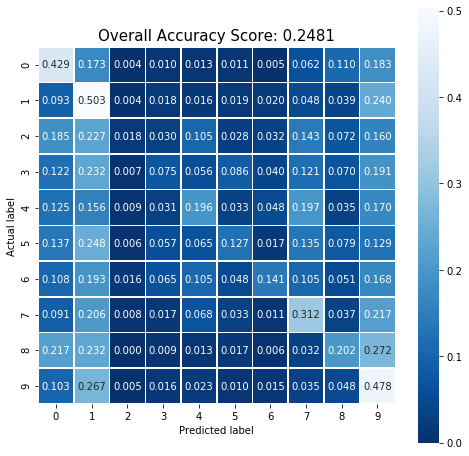

In [32]:
# plot this matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0:.4f}'.format(score[1])
plt.title(all_sample_title, size = 15);
# plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();